In [9]:
# import the necessary files
import numpy as np
import pandas as pd
import seaborn as sns

# read the excel file
df = pd.read_excel('latest.xlsx')
#df = pd.read_csv('data.csv')
df.head()

,bsteroid,asteroid,conditions,bp,classes
0,10,20,Normal,No,Not responding
1,11,10,Normal,No,Not responding
2,12,11,Normal,No,Not responding
3,13,12,Normal,No,Not responding
4,14,13,Normal,No,Not responding


In [10]:
df['conditions']

0      Normal
1      Normal
2      Normal
3      Normal
4      Normal
        ...  
399      High
400      High
401      High
402      High
403      High
Name: conditions, Length: 404, dtype: object

<AxesSubplot:>

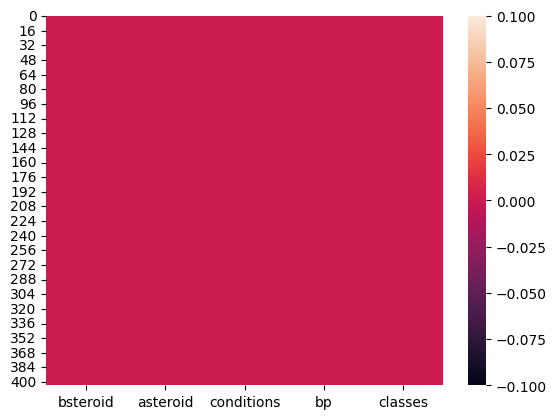

In [11]:
# deduce the null value using sns heatmap
sns.heatmap(df.isnull())

[Text(0.5, 1.0, 'countplot of bd')]

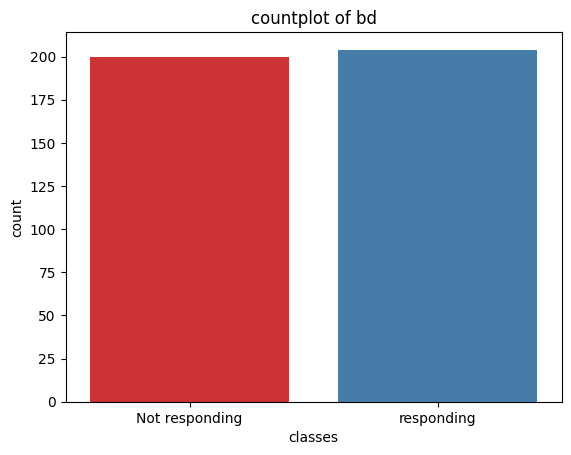

In [12]:
# check the counts of the target variables so as to look out for overfitting
sns.countplot(x='classes', data=df, palette='Set1').set(title='countplot of bd')

In [13]:
# deduce the data types of the independent variables and the dependent variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bsteroid    404 non-null    int64 
 1   asteroid    404 non-null    int64 
 2   conditions  404 non-null    object
 3   bp          404 non-null    object
 4   classes     404 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.9+ KB


In [14]:
# check the status of bp
df['classes']

0      Not responding
1      Not responding
2      Not responding
3      Not responding
4      Not responding
            ...      
399        responding
400        responding
401        responding
402        responding
403        responding
Name: classes, Length: 404, dtype: object

In [18]:
# create a dummy variables to replace no, yes with categorical variables.
# this is necesary so as to make  the dataset suitable for any machine learning models during training
df['conditions'].replace(['Normal', 'High'],[0, 1], inplace=True)
df['bp'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['classes'].replace(['Not responding', 'responding'],[0, 1], inplace=True)

In [19]:
# check the data types again to know if all now has integer datatype
df.dtypes

bsteroid      int64
asteroid      int64
conditions    int64
bp            int64
classes       int64
dtype: object

In [46]:
# preview the first 5 
df.tail(10)

,bsteroid,asteroid,conditions,bp,classes
394,14,73,1,1,1
395,14,74,1,1,1
396,14,75,1,1,1
397,14,76,1,1,1
398,14,77,1,1,1
399,14,78,1,1,1
400,14,79,1,1,1
401,14,80,1,1,1
402,14,81,1,1,1
403,14,82,1,1,1


In [21]:
# display the shape of the data
df2 = df.sample(frac = 1)
df2.head()

,bsteroid,asteroid,conditions,bp,classes
398,14,77,1,1,1
67,15,14,0,0,0
313,13,27,1,1,1
270,11,47,1,1,1
361,14,40,1,1,1


In [22]:
# save the result into csv file, the preferred format for pandas
df.to_csv('latest.csv', index= False)

In [23]:
# start the main work by importing the saved csv file
import numpy as np
import pandas as pd
df2 = pd.read_csv('latest.csv')
df2.head()

,bsteroid,asteroid,conditions,bp,classes
0,10,20,0,0,0
1,11,10,0,0,0
2,12,11,0,0,0
3,13,12,0,0,0
4,14,13,0,0,0


In [24]:
# convert the independent variables into numpy array. 

X = np.asarray(df2[['bsteroid', 'asteroid', 'conditions', 'bp']])

In [25]:
# convert the label into numpy array as well
y = np.asarray(df2['classes'])

### Lets normalize the dataset.
The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization.
**Normalization: scales each input variable separately to the range 0-1
which is the range for floating-point values where we have the most precision. Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.**

In [26]:
# let normalize the data,
from sklearn import preprocessing
X = preprocessing.MinMaxScaler().fit(X).transform(X)
X[0:6]

array([[0.        , 0.13888889, 0.        , 0.        ],
       [0.09090909, 0.        , 0.        , 0.        ],
       [0.18181818, 0.01388889, 0.        , 0.        ],
       [0.27272727, 0.02777778, 0.        , 0.        ],
       [0.36363636, 0.04166667, 0.        , 0.        ],
       [0.45454545, 0.05555556, 0.        , 0.        ]])

In [27]:
# perform data splititng into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (282, 4) (282,)
Test set: (122, 4) (122,)


In [28]:
X_test[0:5]

array([[0.81818182, 0.13888889, 0.        , 0.        ],
       [0.54545455, 0.06944444, 0.        , 0.        ],
       [0.09090909, 0.04166667, 0.        , 0.        ],
       [0.27272727, 0.23611111, 1.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [29]:
len(X_test)

122

In [30]:
# cloud deduced training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)

In [31]:
#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
model =model.fit(X_train,y_train)

In [32]:
# save the model to disk
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [33]:
yhat = model.predict(X_test)
yhat

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [34]:
# predict probabilities
pred_prob = model.predict_proba(X_test)
pred_prob

array([[0.97394249, 0.02605751],
       [0.96353561, 0.03646439],
       [0.93245697, 0.06754303],
       [0.02634404, 0.97365596],
       [0.9258395 , 0.0741605 ],
       [0.01554203, 0.98445797],
       [0.02634404, 0.97365596],
       [0.02634404, 0.97365596],
       [0.02071428, 0.97928572],
       [0.02634404, 0.97365596],
       [0.01454218, 0.98545782],
       [0.93245697, 0.06754303],
       [0.97739328, 0.02260672],
       [0.02634404, 0.97365596],
       [0.96313822, 0.03686178],
       [0.97394249, 0.02605751],
       [0.97995906, 0.02004094],
       [0.95851008, 0.04148992],
       [0.93245697, 0.06754303],
       [0.94640639, 0.05359361],
       [0.02634404, 0.97365596],
       [0.96313822, 0.03686178],
       [0.93245697, 0.06754303],
       [0.01855081, 0.98144919],
       [0.01896499, 0.98103501],
       [0.02094375, 0.97905625],
       [0.96313822, 0.03686178],
       [0.01679425, 0.98320575],
       [0.95806031, 0.04193969],
       [0.97422652, 0.02577348],
       [0.

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0,1,2]))

[[64  0  0]
 [ 0 58  0]
 [ 0  0  0]]


Confusion matrix, without normalization
[[64  0]
 [ 0 58]]


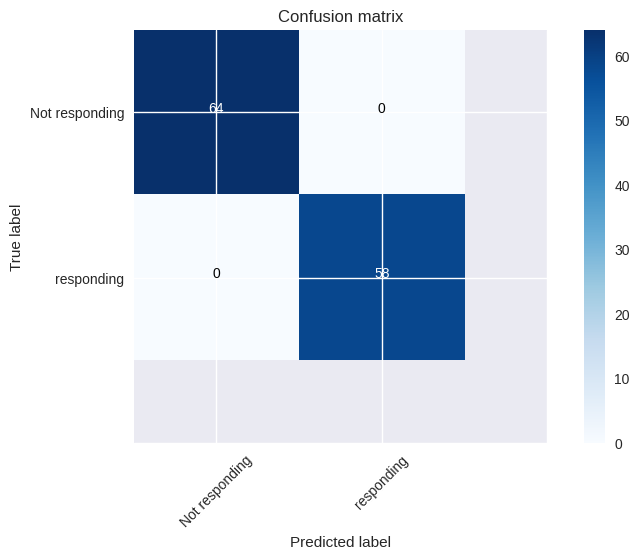

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not responding','responding', ''],normalize= False,  title='Confusion matrix')

In [38]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        58

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122



In [39]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [40]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)

1.0


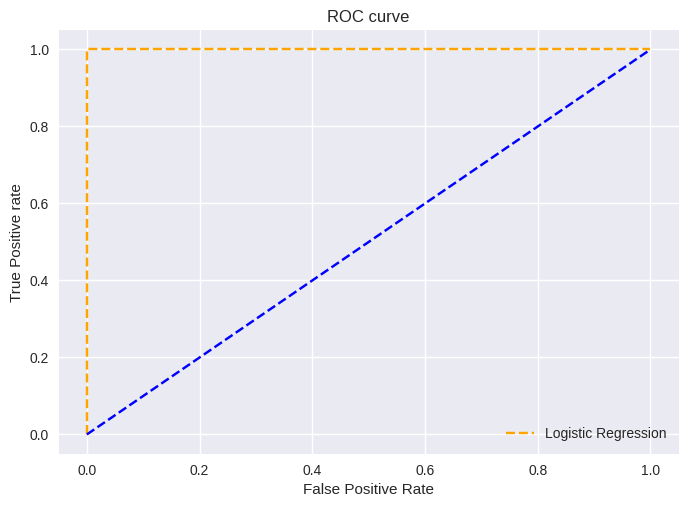

In [41]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
#plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


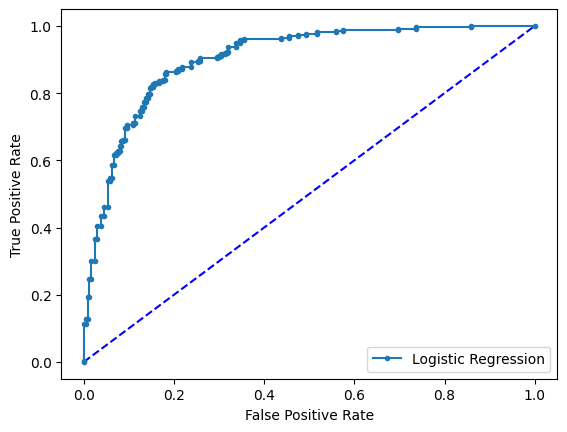

In [1]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', color='blue')
pyplot.plot(lr_fpr, lr_tpr, marker='.', color='orange',label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()